# Machine Learning algorithms
We will apply two machine learning algorithms : Random Forest classifiers and K Means Clustering algorithm. 

#### Importing Libraries

In [244]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#### Loading dataset

In [246]:
df = pd.read_csv('imputed_renamed_dataset.csv')
df.head()

/var/folders/kl/11gkxl5x49l9sffk443vsksh0000gq/T/ipykernel_10065/86583394.py:1: DtypeWarning: Columns (1,2,4,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,32,34,35,36,37,38,39,40,41,42,43,45,47,54,55,56,57,58,59,60,61,62,63,64,66,68,69,70,71,72,73,74,75,76,77,79,81,82,83,84,85,86,87,88,89,90,92,94,96,97,98,99,100,101,102,103,104,105,107,109,110,111,112,113,115,116,117,118,119,120,121,122,123,124,125,126,128,130,131,132,133,134,135,137,139,140,141,142,143,145,147,148,149,150,152,154,155,156,157,158,159,160,161,162,163,165,167,168,169,170,171,172,173,174,175,176,178,180,181,182,183,184,185,186,187,188,189,191,193,194,195,196,197,198,199,200,201,202,204,206,207,208,209,210,211,212,213,214,215,217,219,220,221,222,223,224,225,226,227,228,230,232,233,234,235,236,237,238,239,240,241,243,247,248,250,255,259,260,261,264,265,267,269,270,271,275,276,277,278,279,281,282,285) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('imputed_re

,Duration,Age,Gender,Location,Education,JobTitle,RoleTitleText,CompanySize,DataScienceTeamSize,MLIncorporation,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
0,NaN,NaN,NaN,"Miami, FL",NaN,\tHRIS Specialist,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,"Lubbock, TX",NaN,\tLicensed Vocational Nurse,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,"Lubbock, TX",NaN,\tMerchandiser Drop & Go,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,"Miami, FL",NaN,\tPublic Figure Protection / Executive Protect...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,"Lubbock, TX",NaN,\tSupervisor Clinic Operations,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
df.columns

Index(['Duration', 'Age', 'Gender', 'Location', 'Education', 'JobTitle',
       'RoleTitleText', 'CompanySize', 'DataScienceTeamSize',
       'MLIncorporation',
       ...
       'Employment.Work Activity.Design',
       'Employment.Work Activity.Development',
       'Employment.Work Activity.Human Resources',
       'Employment.Work Activity.Managing/Supervising People/Projects',
       'Employment.Work Activity.Other',
       'Employment.Work Activity.Productions/Operations/Maintenance',
       'Employment.Work Activity.Professional Service',
       'Employment.Work Activity.Qualitity/Productivity Management',
       'Employment.Work Activity.Sales, Purchasing, Marketing',
       'Employment.Work Activity.Teaching'],
      dtype='object', length=333)

In [212]:
with open('column_names.txt', 'w') as write_file:
    for column in df.columns:
        write_file.write(f"{column}\n")

In [213]:
df = df.fillna(0)
df.info

<bound method DataFrame.info of        Duration    Age Gender     Location  \
0           0.0      0      0    Miami, FL   
1           0.0      0      0  Lubbock, TX   
2           0.0      0      0  Lubbock, TX   
3           0.0      0      0    Miami, FL   
4           0.0      0      0  Lubbock, TX   
...         ...    ...    ...          ...   
82837     128.0  18-21   Male     Viet Nam   
82838     143.0  18-21   Male     Viet Nam   
82839      92.0  22-24   Male     Viet Nam   
82840      48.0  25-29   Male     Viet Nam   
82841     181.0  18-21   Male     Viet Nam   

                                               Education  \
0                                                      0   
1                                                      0   
2                                                      0   
3                                                      0   
4                                                      0   
...                                                  ..

In [214]:
n_rows = len(df)
df = df.iloc[:n_rows // 4]

## Question 1 Solution
How effective are online learning platforms in improving job market readiness compared to traditional university degrees ?


### Hypothesis 1 Solution
People who learn from online platforms like Coursera, in addition to traditional degrees, have higher salaries and job placement rates in their respective fields.

#### Preprocessing dataset

In [215]:
# Define relevant features for a more comprehensive model
features = [
    'Education', 
    'ExperienceLevel', 
    'CoursesCoursera', 
    'JobTitle', 
    'CompanySize', 
    'DataScienceTeamSize', 
    'MLIncorporation', 
    'PrimaryToolSelected', 
    'Industry', 
    'Remote_Friendly', 
    'Location'
]
X = df[features]
y = df['YearlyCompensation']  # Target variable

# Preprocessing - Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)
# Handle missing values (if any)
X.fillna(0, inplace=True)

y.loc[y == 0] = '$0-999'

/var/folders/kl/11gkxl5x49l9sffk443vsksh0000gq/T/ipykernel_10065/3780773571.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y == 0] = '$0-999'


In [216]:
i = 0
salary_mapping = {}

for k in y.unique():
    salary_mapping[k] = i
    i+=1

y = y.map(salary_mapping)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: YearlyCompensation, dtype: int64

In [217]:
# y.fillna(y.mean(), inplace=True)  # Alternatively, you can drop rows with missing target values
# y = pd.get_dummies(y, drop_first=True)

# labelEncoder = LabelEncoder()
# y = labelEncoder.fit_transform(y)
# y.head()

In [218]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [219]:
# Initialize the Random Forest Regressor
# model = KNeighborsClassifier(n_neighbors=5)
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [220]:

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 22.41944310317077
Mean Absolute Error: 1.8004184773861258
R-squared: 0.23133715445276803


### Hypothesis 2 Solution
Learning from online platforms helps professionals gain more Machine Learning experience in their respective job titles. This occurs because online platforms supplements formal education by providing more up-to-date knowledge and more practical experience.

#### Preproceessing dataset

In [231]:
# Selecting relevant features
# Assuming 'MLExperienceYears' is the target variable and 'CoursesCoursera', 'Education', 'JobTitle' are relevant features
# Modify these column names based on your actual data
features = ['CoursesCoursera', 'Education', 'JobTitle']  # Add or modify columns based on available relevant features
X = df[features]
y = df['MLExperienceYears']  # Target variable

# Preprocessing - converting categorical variables into dummy/indicator variables
X = pd.get_dummies(X, columns=features, drop_first=True)
# y = pd.get_dummies(y, columns=['MLExperienceYears'], drop_first=True)

In [232]:
X.head()

,CoursesCoursera_Coursera,Education_Bachelor’s degree,Education_Doctoral degree,Education_I prefer not to answer,Education_Master’s degree,Education_No formal education past high school,Education_Professional degree,Education_Some college/university study without earning a bachelor’s degree,JobTitle_\tHRIS Specialist,JobTitle_\tLicensed Vocational Nurse,...,JobTitle_Data Science intern (30 May) DIN48,JobTitle_Data Science intern (30 May) DIN49,JobTitle_Data Science intern -DIN17,JobTitle_Data Science intern -DIN18,JobTitle_Data Science intern -DIN51,JobTitle_Data Science intern -DIN52,JobTitle_Data Science intern -DIN53,JobTitle_Data Science/Data Engineering Intern,JobTitle_Data Science/NLP intern ( Apr 30),JobTitle_Data Scientist
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [233]:
i = 0
experience_mapping = {}
y.loc[y == 0] = '< 1 years'

for k in y.unique():
    experience_mapping[k] = i
    i+=1

y = y.map(experience_mapping)
y.head()

/var/folders/kl/11gkxl5x49l9sffk443vsksh0000gq/T/ipykernel_10065/1365670485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y == 0] = '< 1 years'


0    0
1    0
2    0
3    0
4    0
Name: MLExperienceYears, dtype: int64

In [234]:
y.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [235]:
# y = pd.get_dummies(y, columns=['MLExperienceYears'], drop_first=True)

In [236]:
y.value_counts()

MLExperienceYears
0    17285
3     1308
4      809
1      461
5      386
7      315
2       94
6       52
Name: count, dtype: int64

In [237]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [238]:
X_train.head()

,CoursesCoursera_Coursera,Education_Bachelor’s degree,Education_Doctoral degree,Education_I prefer not to answer,Education_Master’s degree,Education_No formal education past high school,Education_Professional degree,Education_Some college/university study without earning a bachelor’s degree,JobTitle_\tHRIS Specialist,JobTitle_\tLicensed Vocational Nurse,...,JobTitle_Data Science intern (30 May) DIN48,JobTitle_Data Science intern (30 May) DIN49,JobTitle_Data Science intern -DIN17,JobTitle_Data Science intern -DIN18,JobTitle_Data Science intern -DIN51,JobTitle_Data Science intern -DIN52,JobTitle_Data Science intern -DIN53,JobTitle_Data Science/Data Engineering Intern,JobTitle_Data Science/NLP intern ( Apr 30),JobTitle_Data Scientist
14782,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16518,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Model Initialization

In [240]:

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Measuring model performance

In [241]:
# Make predictions on the test set
y_pred = model.predict(X_test)

y_test = y_test.to_numpy()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.8421052631578947

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      5173
           1       0.00      0.00      0.00       142
           2       0.00      0.00      0.00        31
           3       0.35      0.18      0.24       390
           4       0.23      0.26      0.24       255
           5       0.00      0.00      0.00       115
           6       0.00      0.00      0.00        15
           7       0.23      0.22      0.22        92

    accuracy                           0.84      6213
   macro avg       0.21      0.20      0.21      6213
weighted avg       0.78      0.84      0.81      6213


Confusion Matrix:
 [[5076    0    0   48   41    0    0    8]
 [  64    0    0   13   48    0    0   17]
 [  19    0    0    0    7    0    0    5]
 [ 258    0    0   69   57    0    0    6]
 [ 137    0    0   37   67    0    0   14]
 [  46    0    0   13   43    0    0   13]
 [   6    0    0 

/Users/future/anaconda3/envs/dic/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/future/anaconda3/envs/dic/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/future/anaconda3/envs/dic/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

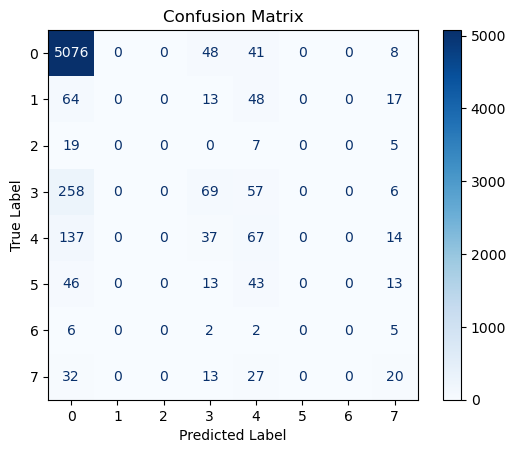

In [243]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)  # Choose a color map (optional)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Question 2 Solution
How does geographic location affect job opportunities, and should relocation be considered for career growth?

### Hypothesis Solution
Regions with higher concentrations of tech and finance sectors offer significantly higher median salaries and more job opportunities, making relocation a good strategy for career growth.

In [253]:
# Select features for clustering
features = ['Salaries.Median', 'Views', 'Industry']
X = df[features]
X = pd.get_dummies(X, columns=features, drop_first=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [254]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_new = df.copy()
df_new['Cluster'] = kmeans.fit_predict(X_scaled)

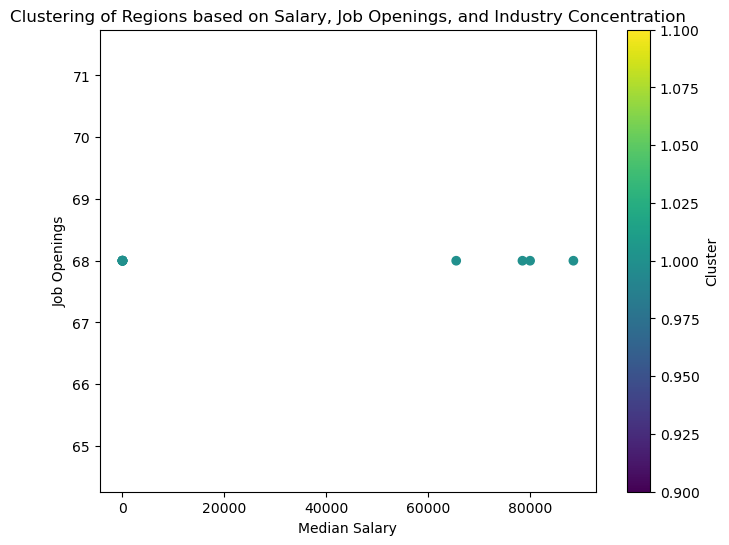

In [257]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_new['Salaries.Median'], df_new['Views'], c=df_new['Cluster'], cmap='viridis', marker='o')
plt.xlabel("Median Salary")
plt.ylabel("Job Openings")
plt.title("Clustering of Regions based on Salary, Job Openings, and Industry Concentration")
plt.colorbar(label='Cluster')
plt.show()

# Display the DataFrame with clusters
# print(df_new[['Region', 'Salaries.Median', 'Views', 'Industry', 'Cluster']])

## Test

In [ ]:
cols = df.select_dtypes(include='float64')
cols.value_counts()

Duration  RoleTitleText  WorkRoleActivitiesText  Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - None  FavMediaOtherText  On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - None  CoursesOtherText  PrimaryToolBasicStatText  PrimaryToolAdvStatText  PrimaryToolBizIntelligenceText  PrimaryToolLocalDevText  PrimaryToolCloudDataText  PrimaryToolOtherText  Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - None  IDEsOtherText  Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - None  HostedNotebooksOtherText  What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - None  LanguagesOtherText  RecommendedLangOtherText  What data visualization libraries or to

In [ ]:
df2 = pd.read_csv('merged_dataset.csv')
df2.head()

/var/folders/kl/11gkxl5x49l9sffk443vsksh0000gq/T/ipykernel_10065/3614778839.py:1: DtypeWarning: Columns (1,2,5,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,33,35,36,37,38,39,40,41,42,43,44,46,48,55,56,57,58,59,60,61,62,63,64,65,67,69,70,71,72,73,74,75,76,77,78,80,82,83,84,85,86,87,88,89,90,91,93,95,97,98,99,100,101,102,103,104,105,106,108,110,111,112,113,114,116,117,118,119,120,121,122,123,124,125,126,127,129,131,132,133,134,135,136,138,140,141,142,143,144,146,148,149,150,151,153,155,156,157,158,159,160,161,162,163,164,166,168,169,170,171,172,173,174,175,176,177,179,181,182,183,184,185,186,187,188,189,190,192,194,195,196,197,198,199,200,201,202,203,205,207,208,209,210,211,212,213,214,215,216,218,220,221,222,223,224,225,226,227,228,229,231,233,234,235,236,237,238,239,240,241,242,244,248,249,251,256,260,261,262,265,266,268,270,271,272,276,277,278,279,280,282,283,286) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('merge

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,Location,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Job_Title,Select the title most similar to your current role (or most recent title if retired): - Other - Text,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
0,510.0,22-24,Male,-1.0,France,Master’s degree,Software Engineer,-1.0,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,906.0,45-49,Male,-1.0,France,Master’s degree,Software Engineer,-1.0,0-49 employees,1-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,493.0,22-24,Male,-1.0,France,Master’s degree,Software Engineer,-1.0,0-49 employees,1-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,724.0,35-39,Female,-1.0,France,Bachelor’s degree,Software Engineer,-1.0,250-999 employees,5-9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,376.0,30-34,Male,-1.0,France,Master’s degree,Software Engineer,-1.0,"1000-9,999 employees",3-4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2.value_counts()

Series([], Name: count, dtype: int64)